In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [4]:
df = pd.read_csv(r"C:\\Users\\Navya\\Downloads\\labeled_data.csv")
print(df.head())
print(df.size)
print(df.shape)

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
173481
(24783, 7)


In [5]:
df["labels"]=df["class"].map({0:"Hate Speech", 1:"Offensive Speech",2:"No Hate and Offensive Speech"})

In [6]:
df=df[["tweet","labels"]]

In [7]:
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech


In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r'[.?]', '',text)
    text = re.sub(r'https?://\S+', '',text)
    text = re.sub(r'<.?>+', '',text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '',text)
    text = re.sub(r'\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)


In [9]:
x=np.array(df["tweet"])
y=np.array(df["labels"])

In [10]:
cv=CountVectorizer()

In [11]:
 X=cv.fit_transform(x)

In [12]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
model=DecisionTreeClassifier()

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8767575498227167


In [17]:
i="you are too mean"
i = cv.transform([i]).toarray()
print(model.predict(i))

['No Hate and Offensive Speech']


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                              precision    recall  f1-score   support

                 Hate Speech       0.36      0.29      0.32       465
No Hate and Offensive Speech       0.79      0.85      0.82      1379
            Offensive Speech       0.93      0.93      0.93      6335

                    accuracy                           0.88      8179
                   macro avg       0.69      0.69      0.69      8179
                weighted avg       0.87      0.88      0.87      8179



In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred_tuned))


0.8798141582100502


In [20]:
feature_names = cv.get_feature_names_out()
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))


       Feature  Importance
4618     bitch    0.082610
14801      hoe    0.070049
25434    pussy    0.062733
4664   bitches    0.053129
14849     hoes    0.052959
11411   faggot    0.016932
28284     shit    0.015809
3206       ass    0.013803
12554     fuck    0.013044
22445   niggah    0.013018


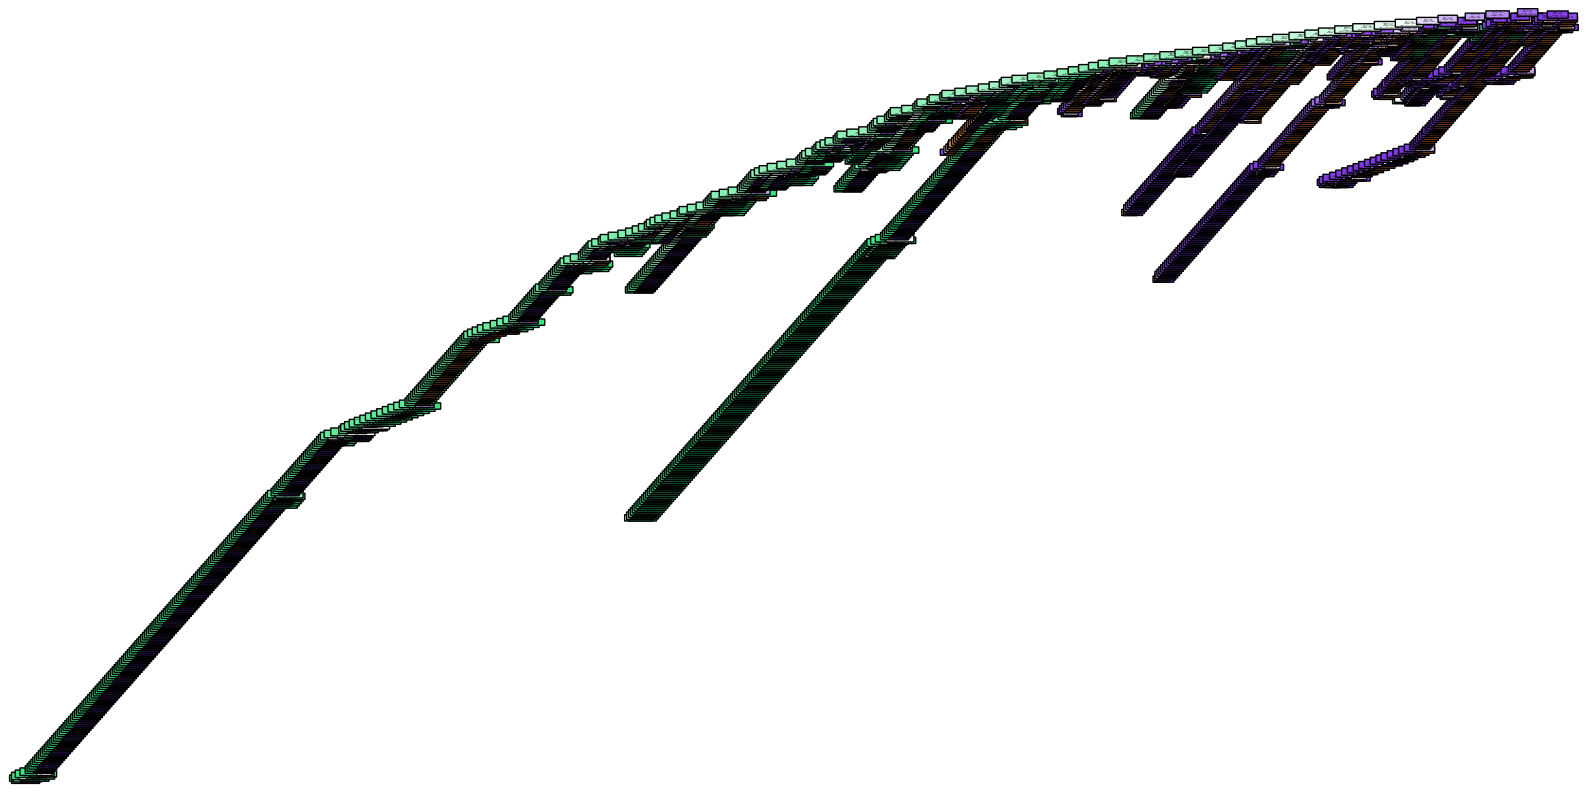

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=cv.get_feature_names_out(), class_names=model.classes_, filled=True, rounded=True)
plt.show()
